In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from functools import reduce

In [280]:
data = pd.read_excel('/content/Привязка ID.xlsx', index_col='ID')
data1 = pd.read_excel('/content/Объёмы перевозок.xls')
data2 = pd.read_excel('/content/Обращения.xls', index_col='ID')
data3 = pd.read_excel('/content/Интересы.xls', index_col='ID')
data4 = pd.read_excel('/content/МС_Республика Чувашия.xls', index_col='ID')
data5 = pd.read_excel('/content/МС_Республика Удмуртия.xls', index_col='ID')
data6 = pd.read_excel('/content/МС_Республика Татарстан.xls', index_col='ID')
data7 = pd.read_excel('/content/МС_Республика Мордовия.xls', index_col='ID')
data8 = pd.read_excel('/content/МС_Республика Марий Эл.xls', index_col='ID')
data9 = pd.read_excel('/content/МС_Нижегородская область.xls', index_col='ID')
data10 = pd.read_excel('/content/МС_Кировская область.xls', index_col='ID')
data11 = pd.read_excel('/content/МС_Владимирская область.xls', index_col='ID')


In [281]:
dataframes = [data4, data5, data6, data7, data8, data9, data10, data11]
data_concatenated = pd.concat(dataframes)
# 1. Удаление строк с NaN в строковых столбцах, если процент NaN > 40%
string_columns = data_concatenated.select_dtypes(include=['object']).columns.tolist()

for col in string_columns:
    nan_percentage = data_concatenated[col].isna().mean() * 100
    if nan_percentage > 40:
        data_concatenated = data_concatenated.dropna(subset=[col])
    else:
        data_concatenated[col].fillna(data_concatenated[col].mode()[0], inplace=True)

# 2. Заполнение NaN в числовых столбцах медианой
num_columns = data_concatenated.select_dtypes(include=[np.number]).columns.tolist()
data_concatenated[num_columns] = data_concatenated[num_columns].fillna(data_concatenated[num_columns].median())

# Вывод результата
print("Обработанный DataFrame:")

# Проверка на дубликаты
duplicates = data_concatenated.duplicated()
print("Дубликаты:")
print(duplicates)

# Подсчет количества дубликатов
count_duplicates = data_concatenated.duplicated().sum()
print(f"Количество дубликатов: {count_duplicates}")

# Показать все дублирующиеся строки
duplicate_rows = data_concatenated[data_concatenated.duplicated(keep=False)]
print("Все дублирующиеся строки:")
print(duplicate_rows)

# Удаление дубликатов
data_no_duplicates = data_concatenated.drop_duplicates()
print("DataFrame без дубликатов:")
print(data_no_duplicates)



<ipython-input-281-0c1eacab3e44>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_concatenated[col].fillna(data_concatenated[col].mode()[0], inplace=True)
<ipython-input-281-0c1eacab3e44>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

Обработанный DataFrame:
Дубликаты:
ID
10586    False
10586    False
10586    False
10586    False
10586    False
         ...  
835      False
835      False
835      False
835      False
835      False
Length: 97975, dtype: bool
Количество дубликатов: 6
Все дублирующиеся строки:
      Находится в реестре МСП Размер компании.Наименование  \
ID                                                           
10590                     Нет               Средний бизнес   
10590                     Нет               Средний бизнес   
10590                     Нет               Средний бизнес   
10590                     Нет               Средний бизнес   
10590                     Нет               Средний бизнес   
10590                     Нет               Средний бизнес   
10590                     Нет               Средний бизнес   
10590                     Нет               Средний бизнес   
10590                     Нет               Средний бизнес   
10590                     Нет        

In [282]:
data_concatenated
data_concatenated['Грузоотправитель'][ data_concatenated['Грузоотправитель']=='Да' ] = 1
data_concatenated['Грузоотправитель'][ data_concatenated['Грузоотправитель']=='Нет' ] = 0
data_concatenated['Находится в реестре МСП'][ data_concatenated['Находится в реестре МСП']=='Да' ] = 1
data_concatenated['Находится в реестре МСП'][ data_concatenated['Находится в реестре МСП']=='Нет' ] = 0
data_concatenated['Грузополучатель'][ data_concatenated['Грузополучатель']=='Да' ] = 1
data_concatenated['Грузополучатель'][ data_concatenated['Грузополучатель']=='Нет' ] = 0
data_concatenated['Госконтракты.Тип контракта'][ data_concatenated['Госконтракты.Тип контракта']=='Заказчик' ] = 1
data_concatenated['Госконтракты.Тип контракта'][ data_concatenated['Госконтракты.Тип контракта']=='Исполнитель' ] = 0
data_concatenated['Размер компании.Наименование'][ data_concatenated['Размер компании.Наименование']=='Микробизнес' ] = 0
data_concatenated['Размер компании.Наименование'][ data_concatenated['Размер компании.Наименование']=='Малый бизнес' ] = 1
data_concatenated['Размер компании.Наименование'][ data_concatenated['Размер компании.Наименование']=='Средний бизнес' ] = 2
data_concatenated['Размер компании.Наименование'][ data_concatenated['Размер компании.Наименование']=='Крупный бизнес' ] = 3
data_concatenated = data_concatenated.drop(['ОКВЭД2.Наименование', 'ОКВЭД2.Код', 'Город юридический', 'ЕЛС действующий', 'Госконтракты.Контракт', 'Карточка клиента (внешний источник).Индекс платежной дисциплины Описание', 'Карточка клиента (внешний источник).Индекс финансового риска Описание'],axis=1)

<ipython-input-282-b5a952765c4f>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_concatenated['Грузоотправитель'][ data_concatenated['Грузоотправитель']=='Да' ] = 1
<ipython-input-282-b5a952765c4f>:3: FutureWarning: ChainedAssignmentEr

In [283]:
data_concatenated1 = data1.drop([ column_name for column_name in data1.columns[5::2] ], axis=1)

for column in data_concatenated1.columns[5:]:
    data_concatenated1[ f'{data_concatenated1[column][0]}' ] = data_concatenated1[column][2:]
    del data_concatenated1[column]

for column in data_concatenated1.columns[:5]:
    data_concatenated1[ f'{data_concatenated1[column][1]}' ] = data_concatenated1[column][2:]
    del data_concatenated1[column]

data_concatenated1 = data_concatenated1.drop([0, 1])

In [284]:
# 1. Удаление строк с NaN в строковых столбцах, если процент NaN > 40%
string_columns = data_concatenated1.select_dtypes(include=['object']).columns.tolist()

for col in string_columns:
    nan_percentage = data_concatenated1[col].isna().mean() * 100
    if nan_percentage > 40:
        data_concatenated1 = data_concatenated1.dropna(subset=[col])
    else:
        data_concatenated1[col].fillna(data_concatenated1[col].mode()[0], inplace=True)

# 2. Заполнение NaN в числовых столбцах медианой
num_columns = data_concatenated1.select_dtypes(include=[np.number]).columns.tolist()
data_concatenated1[num_columns] = data_concatenated1[num_columns].fillna(data_concatenated1[num_columns].median())

# Вывод результата
print("Обработанный DataFrame:")

# Проверка на дубликаты
duplicates = data_concatenated1.duplicated()
print("Дубликаты:")
print(duplicates)

# Подсчет количества дубликатов
count_duplicates = data_concatenated1.duplicated().sum()
print(f"Количество дубликатов: {count_duplicates}")

# Показать все дублирующиеся строки
duplicate_rows = data_concatenated1[data_concatenated1.duplicated(keep=False)]
print("Все дублирующиеся строки:")
print(duplicate_rows)





Обработанный DataFrame:
Дубликаты:
2        False
3        False
4        False
5        False
6        False
         ...  
13422    False
13423    False
13424    False
13425    False
13426    False
Length: 13425, dtype: bool
Количество дубликатов: 0
Все дублирующиеся строки:
Empty DataFrame
Columns: [2022/08, 2023/10, 2024/01, 2022/11, 2022/10, 2022/05, 2022/06, 2022/09, 2022/12, 2022/04, 2022/03, 2024/02, 2024/05, 2024/06, 2024/03, 2024/04, 2023/12, 2024/07, 2022/02, 2023/01, 2023/02, 2023/04, 2023/05, 2023/06, 2023/09, 2023/11, 2022/07, 2023/08, 2023/03, 2024/08, 2022/01, 2023/07, ID, Субъект федерации отп, Субъект федерации наз, Код груза, Гр груза по опер.номен]
Index: []

[0 rows x 37 columns]


<ipython-input-284-0843f3926b58>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_concatenated1[col].fillna(data_concatenated1[col].mode()[0], inplace=True)


In [285]:
df = pd.merge(data_concatenated1, data_concatenated, on='ID')

In [289]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Субъект федерации отп'] = label_encoder.fit_transform(df['Субъект федерации отп'])
df['Субъект федерации наз'] = label_encoder.fit_transform(df['Субъект федерации наз'])
df['Гр груза по опер.номен'] = label_encoder.fit_transform(df['Гр груза по опер.номен'])
#df = df.drop(['Код груза'],axis=1)
df = df.drop(['Город фактический'],axis=1)
#df = df.drop(['Грузоотправитель'],axis=1)
#df = df.drop(['2022/01','2022/02','2022/03','2022/04','2022/05','2022/06','2022/07','2022/08','2022/09','2022/10','2022/11','2022/12'],axis=1)
#df = df.drop(['ID'],axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Определение признаков и целевой переменной
y = df['2024/08']
X = df.drop(columns=['2024/08'])  # Замените 'target_column' на название вашей целевой переменной


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Обучение модели Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Получение важности признаков
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [275]:
df1 = df

In [276]:
df2 = df

In [277]:
#Линейная регрессия
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y = df1['2024/08']
df1 = df1.drop(['2024/08'],axis=1)
X = df1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Предсказания:", y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R^2):", r2)

Предсказания: [ 155.73903818   54.60522687   42.19078225 ...  275.79019232    7.35997218
 1089.13914089]
Среднеквадратичная ошибка (MSE): 189872.72910413286
Коэффициент детерминации (R^2): 0.8125157495086706


In [278]:
#Регрессивные деревья
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Используем регрессор
from sklearn.metrics import mean_squared_error, r2_score
y = df2['2024/08']
df2 = df2.drop(['2024/08'],axis=1)
X = df2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error (MSE): 46.39
R² Score: 1.00


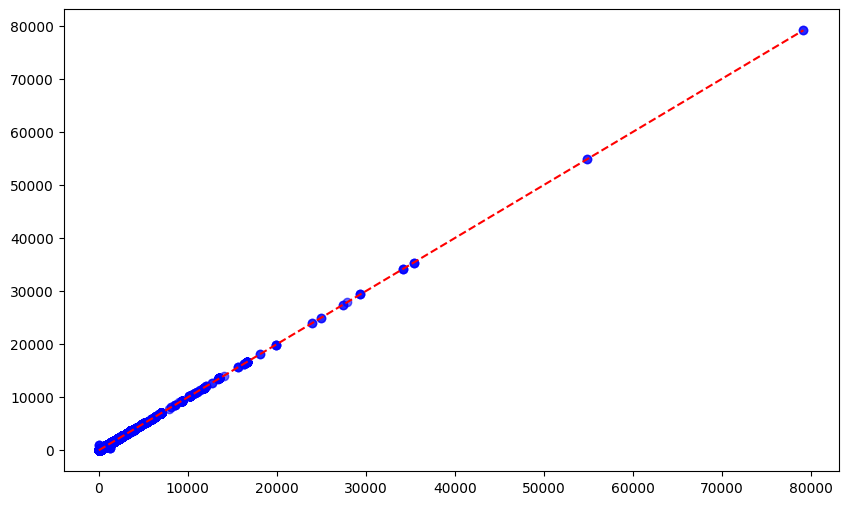

In [279]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Предсказанные значения', color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Линия идеальных предсказаний')

['2022/08',
 '2023/10',
 '2024/01',
 '2022/11',
 '2022/10',
 '2022/05',
 '2022/06',
 '2022/09',
 '2022/12',
 '2022/04',
 '2022/03',
 '2024/02',
 '2024/05',
 '2024/06',
 '2024/03',
 '2024/04',
 '2023/12',
 '2024/07',
 '2022/02',
 '2023/01',
 '2023/02',
 '2023/04',
 '2023/05',
 '2023/06',
 '2023/09',
 '2023/11',
 '2022/07',
 '2023/08',
 '2023/03',
 '2022/01',
 '2023/07',
 'ID',
 'Субъект федерации отп',
 'Субъект федерации наз',
 'Код груза',
 'Гр груза по опер.номен',
 'Находится в реестре МСП',
 'Размер компании.Наименование',
 'Размер уставного капитала объявленный',
 'Численность персонала по данным ФНС.Количество',
 'Грузоотправитель',
 'Грузополучатель',
 'Карточка клиента (внешний источник).Индекс платежной дисциплины Значение',
 'Карточка клиента (внешний источник).Индекс финансового риска Значение',
 'Госконтракты.Тип контракта']

In [ ]:
num_cols = [
    "Дата ",
    "Номер",
    "Количество доработок",
    "Дата ",
    "Ожидаемая выручка",
    "Вероятность сделки, %",
    "Номер",
    "Ссылка",
    "Размер уставного капитала объявленный",
    "Численность персонала по данным ФНС.Количество",
    "ЕЛС действующий"


]

cat_cols = [
    "Тема",
    "Тип обращения",
    "Тема вопроса",
    "Группа вопросов",
    "Тема",
    "Сценарий",
    "Состояние",
    "Подразделение",
    "Канал первичного интереса",
    "Находится в реестре МСП",
    "Размер компании.Наименование",
    "ОКВЭД2.Наименование",
    "Город фактический",
    "Город юридический",
    "Грузоотправитель",
    "Грузополучатель",
    "Госконтракты.Тип контракта"
]

target = ''

In [ ]:

revenue_threshold = 100000  # Пример порога для выручки
probability_threshold = 30  # Пример порога для вероятности сделки
rework_threshold = 5  # Пример порога для количества доработок

# Создание бинарной целевой переменной
dF['Ушел'] = ((df['Ожидаемая выручка'] < revenue_threshold) &
               (df['Вероятность сделки, %'] < probability_threshold) &
               (df['Количество доработок'] > rework_threshold)).astype(int)

# Определение целевой переменной
target = 'Ушел'  # Теперь мы используем созданный столбец как таргет